In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam ,SGD
from keras.applications.mobilenet import MobileNet
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf

import cv2
import os

import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
labels = ['Chapman', 'Cockcroft', 'Library', 'Maxwell', 'Media City Campus', 'New Adelphi', 'New Science', 'Newton', 'Sports Center', 'University House']

In [ ]:
labels = ['Chapman', 'Cockcroft', 'Library', 'Maxwell', 'Media City Campus', 'New Adelphi', 'New Science', 'Newton', 'Sports Center', 'University House']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
print('here')
train = get_data("/content/drive/MyDrive/dataset")

here


<ipython-input-32-fb72e895c665>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


[5, 5, 5, 6, 7, 0, 4, 1, 5, 3, 7, 4, 5, 2, 3, 7, 3, 1, 6, 6, 8, 0, 9, 3, 9, 7, 6, 1, 4, 1, 8, 5, 7, 5, 1, 6, 3, 2, 7, 5, 3, 6, 6, 7, 4, 9, 9, 2, 7, 6, 9, 4, 7, 3, 4, 4, 0, 3, 7, 8, 7, 3, 6, 4, 5, 4, 0, 4, 1, 7, 0, 3, 5, 7, 6, 2, 5, 6, 1, 0, 7, 5, 3, 6, 3, 9, 6, 8, 7, 2, 8, 5, 0, 5, 6, 4, 7, 0, 3, 8, 3, 0, 4, 8, 5, 2, 4, 8, 5, 1, 7, 7, 9, 8, 2, 5, 2, 3, 3, 5, 6, 2, 6, 9, 4, 0, 1, 4, 5, 0, 7, 5, 1, 9, 3, 1, 5, 4, 4, 6, 3, 1, 7, 3, 5, 8, 8, 0, 5, 2, 1, 7, 2, 7, 2, 4, 3, 9, 8, 8, 6, 7, 2, 5, 5, 2, 0, 4, 7, 5, 0, 2, 6, 0, 4, 6, 6, 1, 5, 1, 7, 5, 4, 8, 6, 3, 0, 1, 4, 5, 2, 6, 3, 0, 1, 7, 4, 7, 9, 0, 4, 5, 8, 3, 2, 8, 9, 4, 3, 4, 0, 2, 5, 7, 7, 0, 6, 9, 4, 2, 8, 3, 6, 1, 7, 7, 4, 7, 9, 9, 0, 6, 7, 9, 8, 0, 8, 3, 5, 8, 2, 4, 3, 7, 9, 7, 9, 0, 4, 8, 1, 8, 7, 7, 1, 3, 6, 3, 0, 1, 4, 5, 7, 9, 6, 5, 7, 8, 5, 3, 4, 0, 1, 7, 2, 5, 8, 2, 1, 3, 8, 0, 6, 6, 7, 4, 9, 5, 1, 4, 4, 5, 5, 4, 2, 8, 7, 5, 7, 3, 4, 5, 0, 6, 2, 8, 3, 6, 0, 2, 2, 0, 4, 0, 7, 1, 8, 0, 5, 0, 7, 2, 2, 3, 1, 9, 6, 6, 4, 0, 3, 6, 4, 

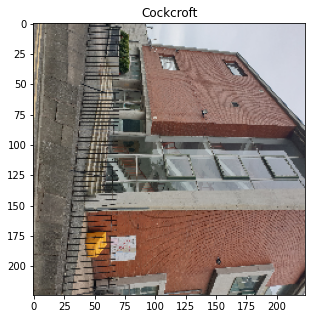

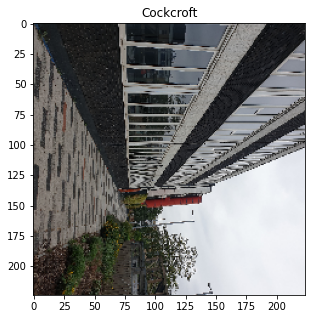

In [ ]:

plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

train, val = train_test_split(train, test_size=0.2, random_state=25)


x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
# Set the number of classes you want to recognize
num_classes = 10

# Load the MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False)

# Add a global average pooling layer and a fully connected layer with the desired number of output units
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Define the model
model = keras.Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                    

In [ ]:
es = EarlyStopping(monitor = "val_loss", patience = 10)

In [ ]:
opt = SGD(lr=0.1)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

history = model.fit(x_train,y_train,epochs = 150 , validation_data = (x_val, y_val), callbacks = [es])


Epoch 1/150
19/19 [==============================] - 6s 230ms/step - loss: 2.7870 - accuracy: 0.4825 - val_loss: 16.8691 - val_accuracy: 0.2119
Epoch 2/150
19/19 [==============================] - 4s 196ms/step - loss: 0.1046 - accuracy: 0.9667 - val_loss: 6.0207 - val_accuracy: 0.4238
Epoch 3/150
19/19 [==============================] - 4s 195ms/step - loss: 0.0166 - accuracy: 0.9967 - val_loss: 5.8968 - val_accuracy: 0.3709
Epoch 4/150
19/19 [==============================] - 4s 198ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.5464 - val_accuracy: 0.4901
Epoch 5/150
19/19 [==============================] - 4s 195ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.9761 - val_accuracy: 0.6358
Epoch 6/150
19/19 [==============================] - 4s 196ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.2667 - val_accuracy: 0.7483
Epoch 7/150
19/19 [==============================] - 4s 197ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.8667 - val_accuracy: 0.821

In [ ]:
VALUE = model.evaluate(x_val, y_val)
print(VALUE)

5/5 [==============================] - 0s 46ms/step - loss: 0.3868 - accuracy: 0.9404
[0.38675448298454285, 0.940397322177887]


In [ ]:
model.save('/content/drive/MyDrive/ICV 2022/Model94%.h5')

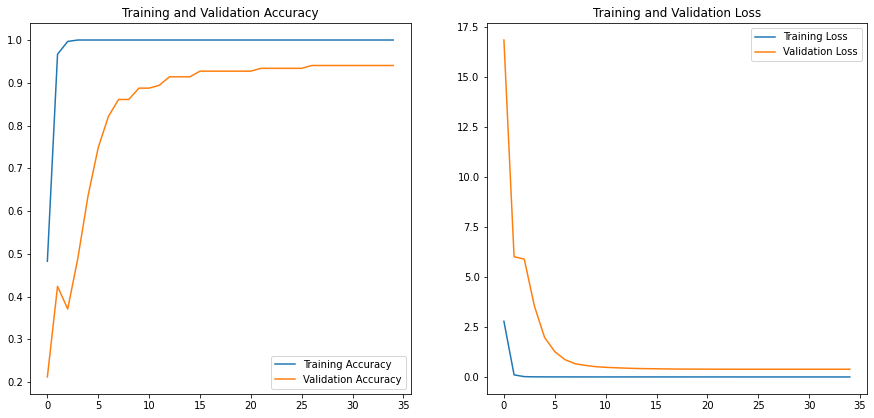

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(35)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
my_model = load_model('/content/drive/MyDrive/ICV 2022/Model94%.h5')


In [ ]:
def assign_prices(prices, product_revenues, target_weighted_avg_price):
    # calculate total revenue
    total_revenue = sum(product_revenues.values())

    # calculate weight for each product based on revenue
    product_weights = {product_id: revenue / total_revenue for product_id, revenue in product_revenues.items()}

    # sort product weights in descending order
    sorted_weights = sorted(product_weights.items(), key=lambda x: x[1], reverse=True)

    # assign prices to products based on weight and target weighted average price
    assigned_prices = {}
    remaining_target_weight = 1.0
    for product_id, weight in sorted_weights:
        if remaining_target_weight == 0:
            assigned_prices[product_id] = 0
            continue
        assigned_price = min(prices, key=lambda x: abs((remaining_target_weight * target_weighted_avg_price) - ((sum(assigned_prices.values()) + (weight * x)) / total_revenue)))
        assigned_prices[product_id] = assigned_price
        remaining_target_weight -= weight * (assigned_price / target_weighted_avg_price)

    return assigned_prices
  

prices = [ 45, 50, 55,60, 70, 80, 90 , 100]
product_revenues = {'A': 100, 'B': 150, 'C': 200, 'D': 250, 'E': 300}
target_weighted_avg_price = 25

assigned_prices = assign_prices(prices, product_revenues, target_weighted_avg_price)
print(assigned_prices)



{'E': 100, 'D': 45, 'C': 45, 'B': 45, 'A': 45}
